# Introduction to Bayesian Learning
Author: Volker Krueger

## Numbers Dataset

We have a dataset of handwritten digits from 0 to 9

In [91]:
import numpy as np
import glob
import matplotlib.pyplot as plt
from PIL import Image
from keras.layers import Input, Dense
from keras.models import Model


samples_per_class = 500
number_of_classes = 10

filelist = sorted(glob.glob('../data/*/*.png'))
x = np.array([np.array(Image.open(fname)) for fname in filelist])

y = np.zeros(number_of_classes * samples_per_class,dtype=int)
for cls in range(1,number_of_classes):
    y[(cls*500):(cls+1)*500] = cls   

## Visualizing the Dataset

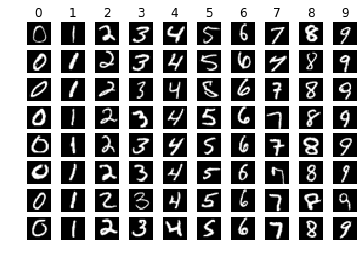

In [92]:
examples_per_class = 8
for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
plt.show()

## Mean

compute the mean of each class and display

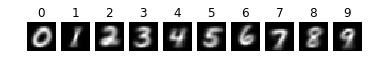

In [93]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y == cls)[0]
    mean_of_class[cls]=np.mean(x[idxs],axis=0) # column wise
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()


## Generate Training and Testing data, and visualize

In [94]:
#######################################################################
# x_train will contain the training data
# y_train will contain the correct classes of the training data
# x_test will contain the test data
# y_test will contain the correct classes for the test data
#######################################################################
x_train=np.zeros((4000,20,20))
y_train=np.zeros(4000)
x_test =np.zeros((1000,20,20))
y_test =np.zeros(1000)

for cls in range(number_of_classes):
    idx=cls*400
    idx1=cls*500
    idx2=cls*100
    x_train[idx:idx+400,:,:]=x[idx1:idx1+400,:,:]
    y_train[idx:idx+400]=y[idx1:idx1+400]
    x_test[idx2:idx2+100,:,:]=x[idx1+400:idx1+500,:,:]
    y_test[idx2:idx2+100]=y[idx1+400:idx1+500]

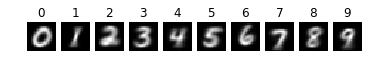

In [95]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y_train == cls)[0]
    mean_of_class[cls]=np.mean(x_train[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()

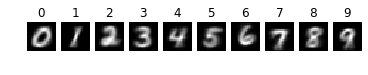

In [96]:
mean_of_class=np.zeros((10,20,20))
for cls in range(number_of_classes):
    idxs = np.where(y_test == cls)[0]
    mean_of_class[cls]=np.mean(x_test[idxs],axis=0)
    plt.subplot(1, number_of_classes, cls + 1)
    plt.imshow(mean_of_class[cls].astype('uint8'), cmap='gray')
    plt.axis('off')
    plt.title(str(cls))
plt.show()

## NCC

In [203]:
def euclidan_distance(m1, m2):
    return np.sqrt(np.sum((m1 - m2) ** 2))  

def NCC(x_train, mean_of_class):
    y_pred = np.zeros(len(x_train))
    for i, x in enumerate(x_train):
        c_min = np.argmin(np.array(list(map(lambda cls: euclidan_distance(x, mean_of_class[cls]), range(number_of_classes)))))
        y_pred[i] = c_min
    return y_pred

In [204]:
y_pred = NCC(x_train, mean_of_class)
test_accuracy = np.mean(y_train == y_pred)
print(test_accuracy)

0.779


## Naive Bayesian classifier

In [177]:
def fit(X, Y):
    
    var_of_class=np.zeros((10,20,20))
    mean_of_class=np.zeros((10,20,20))
    
    for cls in range(number_of_classes):
        idxs = np.where(Y == cls)[0]
        smoothing = 1000
        var_of_class[cls] = np.var(X[idxs],axis=0) + smoothing
        mean_of_class[cls] = np.mean(X[idxs],axis=0)
        
    return mean_of_class, var_of_class

In [178]:
def calculate_priors(X, y):
    priors = []
    f = list(map(lambda x: priors.append(float(len(y[y == x])) / len(y)), list(range(number_of_classes))))
    return priors

In [205]:
import math

def predict(x_test, mean_all, var_all, priors):
    y_pred = []
    
    # For each instance
    for x in x_test:
        class_prob_all = []
        
        # Calculate probability for each label
        for label in range(number_of_classes):
            
            mean = mean_all[label]
            var = var_all[label]
            
            # Gaussian multivariate distribution for each label
            prob = (1 / np.sqrt(2 * np.pi * var) * np.exp(-np.square(x - mean)/(2 * var)))

            # P(x|y = i) + P(y = i) (conditional + prior)
            class_prob = np.sum(np.log(prob) + np.log(priors[label]))

            class_prob_all.append(class_prob)
        
        prediction = np.argmax(class_prob_all)
        y_pred.append(prediction)
    
    return np.array(y_pred)

In [206]:
'''
from sklearn.naive_bayes import GaussianNB
priors = calculate_priors(x_train, y_train)
model = GaussianNB(priors)
model.fit(x_train.reshape(len(x_train), 20*20), y_train)
y_pred = model.predict(x_test.reshape(len(x_test), 20*20))
test_accuracy = np.mean(y_test == y_pred)
print(test_accuracy)
'''

'\nfrom sklearn.naive_bayes import GaussianNB\npriors = calculate_priors(x_train, y_train)\nmodel = GaussianNB(priors)\nmodel.fit(x_train.reshape(len(x_train), 20*20), y_train)\ny_pred = model.predict(x_test.reshape(len(x_test), 20*20))\ntest_accuracy = np.mean(y_test == y_pred)\nprint(test_accuracy)\n'

In [207]:
def NaiveBayesian(x_test):
    mean_all, var_all = fit(x_train, y_train)
    priors = calculate_priors(x_train, y_train)
    y_test_pred = predict(x_test, mean_all, var_all, priors)
    
    return y_test_pred, var_all

## Now lets run your code and evaluate your accuracy

In [208]:
# Evaluate your classifier on the test set
y_test_pred, var_all = NaiveBayesian(x_test)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.795


## Let's visualize some of the wrongly classified test samples.

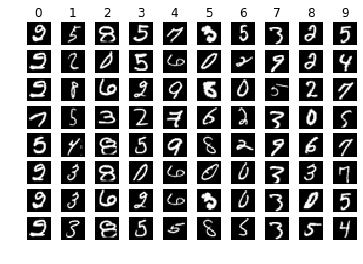

In [14]:
examples_per_class = 8
for cls in range(number_of_classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=True)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, number_of_classes, i * number_of_classes + cls + 1)
        plt.imshow(x_test[idx].astype('uint8'), cmap='gray')
        plt.axis('off')
        if i == 0:
            plt.title(str(cls))
plt.show()

## Neural Networks

In [16]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [17]:
batch_size = 64
num_classes = 10
epochs = 10

### MLP

In [28]:
img_rows, img_cols = 28, 28

#(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.load("/Users/dev/Dev/Bayes/edan95/data/kmnist/kmnist-train-imgs.npz")['arr_0']
y_train = np.load("/Users/dev/Dev/Bayes/edan95/data/kmnist/kmnist-train-labels.npz")['arr_0']

x_test = np.load("/Users/dev/Dev/Bayes/edan95/data/kmnist/kmnist-test-imgs.npz")['arr_0']
y_test = np.load("/Users/dev/Dev/Bayes/edan95/data/kmnist/kmnist-test-labels.npz")['arr_0']

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

inputs = Input(shape=(x_train[0].shape))
x = Dense(512, activation='relu')(inputs)
x = Dropout(0.2)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [ ]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 391us/step - loss: 0.3841 - acc: 0.8847 - val_loss: 0.4724 - val_acc: 0.8578
Epoch 2/10
60000/60000 [==============================] - 312s 5ms/step - loss: 0.1802 - acc: 0.9463 - val_loss: 0.4004 - val_acc: 0.8793
Epoch 3/10
60000/60000 [==============================] - 21s 349us/step - loss: 0.1237 - acc: 0.9633 - val_loss: 0.3551 - val_acc: 0.8972
Epoch 4/10
60000/60000 [==============================] - 20s 339us/step - loss: 0.0910 - acc: 0.9723 - val_loss: 0.3280 - val_acc: 0.9051
Epoch 5/10
 8896/60000 [===>..........................] - ETA: 16s - loss: 0.0644 - acc: 0.9811

In [ ]:
'''
Test loss: 0.05846703333670448
Test accuracy: 0.9829
'''

### CNN

In [3]:
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

input_layer = Input(shape=(x_train[0].shape))
x = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(10, activation='softmax')(x)

model = Model(input_layer, output_layer)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
fla

In [5]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 724us/step - loss: 0.3693 - acc: 0.8830 - val_loss: 0.0766 - val_acc: 0.9764
Epoch 2/10
60000/60000 [==============================] - 45s 750us/step - loss: 0.1403 - acc: 0.9566 - val_loss: 0.0512 - val_acc: 0.9840
Epoch 3/10
60000/60000 [==============================] - 55s 914us/step - loss: 0.1107 - acc: 0.9658 - val_loss: 0.0412 - val_acc: 0.9859
Epoch 4/10
60000/60000 [==============================] - 49s 818us/step - loss: 0.0878 - acc: 0.9726 - val_loss: 0.0352 - val_acc: 0.9881
Epoch 5/10
60000/60000 [==============================] - 42s 706us/step - loss: 0.0793 - acc: 0.9761 - val_loss: 0.0320 - val_acc: 0.9890
Epoch 6/10
60000/60000 [==============================] - 44s 729us/step - loss: 0.0736 - acc: 0.9778 - val_loss: 0.0304 - val_acc: 0.9893
Epoch 7/10
60000/60000 [==============================] - 43s 719us/step - loss: 0.0681 - acc: 0.9796 - val_loss: 0.